# In this notebook we show how to access information on model-components with built-in methods.

Here we how rbatools provides access to information on model components and architecture with the existing RBA-model of Bacillus subtilis (https://pubmed.ncbi.nlm.nih.gov/26498510/).

For further information on rba, please consider our website: https://rba.inrae.fr 

In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy
import rba
from rbatools.rba_session import SessionRBA


In [2]:
model_filename = '../Bacterial-RBA-models/Bacillus-subtilis-168-WT'
# initiate RBA-session with cplex as lp solver. If cplex is not available glpk can be used as lp solver.
#However glpk is significantly slower
Simulation = SessionRBA(model_filename,lp_solver="cplex")
#Simulation = SessionRBA(model_filename,lp_solver="swiglpk")


In [3]:
Simulation.ModelStructure.export_sbtab(filename="../SBtab_Bsubtilis_RBAmodel",add_links=False)

## Access to key information on model

In [ ]:
Simulation.get_general_model_information()

### Key information must be externally provided via csv file in model directory

In [ ]:
#pandas.read_csv(str(model_file_directory+'/ModelInformation.csv'),sep=',', header=0)

## Access to statistics on model

In [ ]:
Simulation.get_model_statistics_information()

## Access to model compartment information

In [ ]:
Simulation.get_compartments()

In [ ]:
print(Simulation.get_compartment_information.__doc__)

In [ ]:
Simulation.get_compartment_information(compartment="Cytoplasm")

## Access to model protein information

In [ ]:
Simulation.get_proteins()

In [ ]:
print(Simulation.get_protein_information.__doc__)

In [ ]:
Simulation.get_protein_information(protein="BSU05830")

## Access to model enzyme information

In [ ]:
Simulation.get_enzymes()

In [ ]:
print(Simulation.get_enzyme_information.__doc__)

In [ ]:
Simulation.get_enzyme_information(enzyme="TptsG_enzyme")

## Access to model reaction information

In [ ]:
Simulation.get_reactions()

In [ ]:
print(Simulation.get_reaction_information.__doc__)

In [ ]:
Simulation.get_reaction_information(reaction="TptsG")

## Access to model metabolite information

In [ ]:
Simulation.get_metabolites()

In [ ]:
print(Simulation.get_metabolite_information.__doc__)

In [ ]:
Simulation.get_metabolite_information(metabolite="M_hpr_c")

## Access to model process information

In [ ]:
Simulation.get_processes()

In [ ]:
print(Simulation.get_process_information.__doc__)

In [ ]:
Simulation.get_process_information(process="Translation")

## Access to model macromolecule information

In [ ]:
Simulation.get_macro_molecules()

In [ ]:
print(Simulation.get_macro_molecule_information.__doc__)

In [ ]:
Simulation.get_macro_molecule_information(macro_molecule="mrna")

## Access to model target information

In [ ]:
Simulation.get_targets()

In [ ]:
print(Simulation.get_target_information.__doc__)

In [ ]:
Simulation.get_target_information(target="Target_concentration_average_protein_Cytoplasm")

## Access to model module information (defined as groups in SBML file)

In [ ]:
Simulation.get_modules()

In [ ]:
print(Simulation.get_module_information.__doc__)

## Access to model density-constraint information

In [ ]:
Simulation.get_density_constraints()

In [ ]:
print(Simulation.get_density_constraint_information.__doc__)

In [ ]:
Simulation.get_density_constraint_information(density_constraint="Cell_membrane_density")


## Access to model enzyme-capacity constraint information

In [ ]:
Simulation.get_enzyme_constraints()

In [ ]:
print(Simulation.get_enzyme_constraint_information.__doc__)

In [ ]:
Simulation.get_enzyme_constraint_information(enzyme_constraint="TptsG_enzyme_forward_capacity")

## Access to model metabolite mass-balance constraint information

In [ ]:
Simulation.get_metabolite_constraints()

In [ ]:
print(Simulation.get_metabolite_constraint_information.__doc__)

In [ ]:
Simulation.get_metabolite_constraint_information(metabolite_constraint="M_fru1p_c")

## Access to model process-capacity constraint information

In [ ]:
Simulation.get_process_constraints()

In [ ]:
print(Simulation.get_process_constraint_information.__doc__)

In [12]:
Simulation.get_process_constraint_information(process_constraint="P_TA_capacity")


{'ID': 'P_TA_capacity',
 'AssociatedProcess': 'Translation',
 'AssociatedProcessID': 'P_TA',
 'CapacityParameterID': 'ribosome_capacity',
 'CapacityParameter': {'Type': 'Aggregate',
  'Equation': '(kmax*growth_rate/(growth_rate+Km))*(e**(RATE*growth_rate))',
  'Variables': ['growth_rate'],
  'Generic_latex': '$_/_frac{V_/_mu}{_/_mu+K} _/_times e^{_/_lambda _/_mu}$',
  'Specific_latex': '$_/_frac{97200.0_/_mu}{_/_mu+0.5} _/_times e^{-0.083333 _/_mu}$',
  'Function_parameters': ['kmax', 'Km', 'Y_MIN', 'e', 'RATE'],
  'Multiplicative Terms': ['ribosome_efficiency_MM',
   'fraction_active_ribosomes']},
 'Generic parameter definition': '$_/_frac{V_/_mu}{_/_mu+K} _/_times e^{_/_lambda _/_mu}$',
 'Specific parameter definition': '$_/_frac{97200.0_/_mu}{_/_mu+0.5} _/_times e^{-0.083333 _/_mu}$',
 'Type': '='}

## Access to mathematical definition of model parameter

In [14]:
translation_efficiency_parameter=Simulation.get_process_constraint_information(process_constraint="P_TA_capacity")["CapacityParameterID"]


In [19]:
print(Simulation.get_parameter_definition.__doc__)


        Returns definition of model parameter.

        Parameters
        ----------
        parameter : str
            ID of model parameter

        Returns
        -------
        Dictionary with parameter definition information: {parameter:info}
        The info value is a dictionary itself, which depends on the whether
        the parameter is among aggrgates or functions.
        info={'Type' : str, --> type of parameter  "Aggrgate" if aggregate and function type (michaelisMenten, linear, constant...) if function
              'Equation' : str, --> mathematical equation of parameter definition
              'Variables' : list, --> list of independent variables of paramter definition (growth-rate or medium components)
              'Function_parameters' : list, --> list of function parameters in function definition.
              'Multiplicative Terms' : list, --> list of multiplicative terms (function IDs) composing the parameter (several function ids if aggregate, only own id

In [15]:
Simulation.get_parameter_definition(parameter=translation_efficiency_parameter)


{'ribosome_capacity': {'Type': 'Aggregate',
  'Equation': '(kmax*growth_rate/(growth_rate+Km))*(e**(RATE*growth_rate))',
  'Variables': ['growth_rate'],
  'Generic_latex': '$_/_frac{V_/_mu}{_/_mu+K} _/_times e^{_/_lambda _/_mu}$',
  'Specific_latex': '$_/_frac{97200.0_/_mu}{_/_mu+0.5} _/_times e^{-0.083333 _/_mu}$',
  'Function_parameters': ['kmax', 'Km', 'Y_MIN', 'e', 'RATE'],
  'Multiplicative Terms': ['ribosome_efficiency_MM',
   'fraction_active_ribosomes']}}

In [20]:
print(Simulation.get_parameter_definition.__doc__)


        Returns definition of model parameter.

        Parameters
        ----------
        parameter : str
            ID of model parameter

        Returns
        -------
        Dictionary with parameter definition information: {parameter:info}
        The info value is a dictionary itself, which depends on the whether
        the parameter is among aggrgates or functions.
        info={'Type' : str, --> type of parameter  "Aggrgate" if aggregate and function type (michaelisMenten, linear, constant...) if function
              'Equation' : str, --> mathematical equation of parameter definition
              'Variables' : list, --> list of independent variables of paramter definition (growth-rate or medium components)
              'Function_parameters' : list, --> list of function parameters in function definition.
              'Multiplicative Terms' : list, --> list of multiplicative terms (function IDs) composing the parameter (several function ids if aggregate, only own id

In [16]:
translation_efficiency_vs_growth_rate=Simulation.get_parameter_evolution(model_parameter=translation_efficiency_parameter,x_values={"growth_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.4,1.6,1.8,2]}) 


Text(0, 0.5, 'Ribosome efficiency (1/h)')

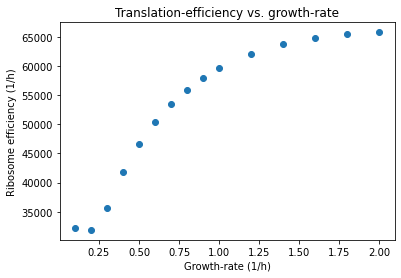

In [18]:
plt.scatter(translation_efficiency_vs_growth_rate["growth_rate"],translation_efficiency_vs_growth_rate["ribosome_capacity"])
plt.title("Translation-efficiency vs. growth-rate")
plt.xlabel("Growth-rate (1/h)")
plt.ylabel("Ribosome efficiency (1/h)")
